<a href="https://colab.research.google.com/github/krdeepak39/Deep-learning-model/blob/main/CNN_on_Fanshion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_X, train_Y), (test_X, test_Y) = keras.datasets.fashion_mnist.load_data()

In [3]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


1
(28, 28)


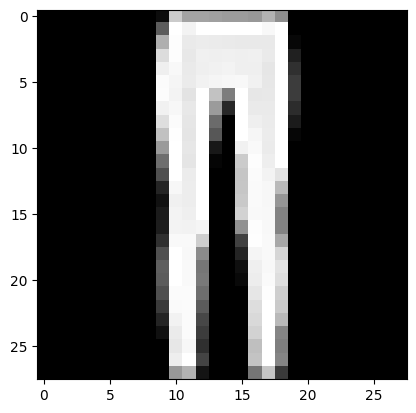

In [4]:
example = train_X[540]
print(train_Y[540])
plt.imshow(example, cmap = 'gray')
print(example.shape)

In [5]:
print(example.max())

255


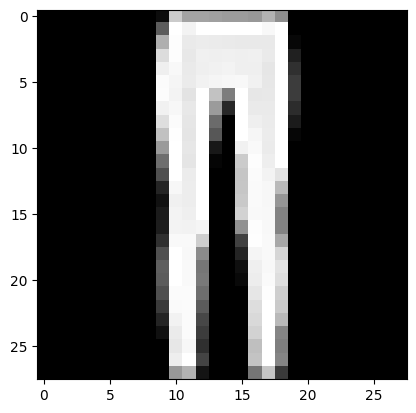

In [6]:
example = example/255
plt.imshow(example, cmap = 'gray')

In [7]:
print(example.max())

1.0


In [8]:
train_X = train_X/255
test_X = test_X/255

In [9]:
print(train_X.shape)

(60000, 28, 28)


In [10]:
train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

In [11]:
print(train_X.shape)

(60000, 28, 28, 1)


In [12]:
train_Y[0]

9

In [13]:
img_shape = (28, 28, 1)
num_class = 10

In [14]:
train_Y = keras.utils.to_categorical(train_Y, num_classes=num_class)
test_Y = keras.utils.to_categorical(test_Y, num_classes=num_class)

In [15]:
model = keras.Sequential([
    keras.Input(shape=img_shape),
    keras.layers.Conv2D(60, kernel_size=(3, 3), strides=(2, 2), padding='valid', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same'),
    keras.layers.Conv2D(120, kernel_size=(3, 3), strides=(2, 2), padding='valid', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same'),
    keras.layers.Conv2D(240, kernel_size=(3, 3), strides=(2, 2), padding='valid', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(num_class, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 60)        600       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 60)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 120)         64920     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 120)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 240)         259440    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 240)         0

In [17]:
model.compile(optimizer = 'Adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics = [keras.metrics.CategoricalAccuracy()])

In [18]:
hist = model.fit(train_X, train_Y, batch_size = 500,  epochs = 50)

Epoch 1/50
120/120 [==============================] - 93s 749ms/step - loss: 0.8154 - categorical_accuracy: 0.6976
Epoch 2/50
120/120 [==============================] - 81s 673ms/step - loss: 0.4486 - categorical_accuracy: 0.8376
Epoch 3/50
120/120 [==============================] - 78s 649ms/step - loss: 0.3798 - categorical_accuracy: 0.8614
Epoch 4/50
120/120 [==============================] - 78s 649ms/step - loss: 0.3297 - categorical_accuracy: 0.8787
Epoch 5/50
120/120 [==============================] - 79s 660ms/step - loss: 0.2998 - categorical_accuracy: 0.8902
Epoch 6/50
120/120 [==============================] - 78s 650ms/step - loss: 0.2843 - categorical_accuracy: 0.8964
Epoch 7/50
120/120 [==============================] - 81s 678ms/step - loss: 0.2636 - categorical_accuracy: 0.9022
Epoch 8/50
120/120 [==============================] - 77s 645ms/step - loss: 0.2508 - categorical_accuracy: 0.9063
Epoch 9/50
120/120 [==============================] - 79s 655ms/step - loss: 0.2

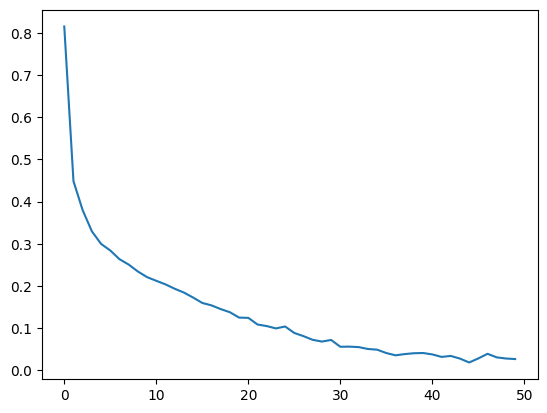

In [19]:
plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])

In [20]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 4s 13ms/step - loss: 0.5765 - categorical_accuracy: 0.9088


[0.5765184760093689, 0.9088000059127808]

In [30]:
predictions = model.predict(test_X)

313/313 [==============================] - 3s 10ms/step


In [42]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 41ms/step
[[1.8384757e-29 1.7470697e-33 1.8426444e-31 0.0000000e+00 1.3773312e-24
  8.2774869e-25 9.5969570e-26 1.6132969e-21 1.0000000e+00 3.1946245e-28]] 8
[1.]


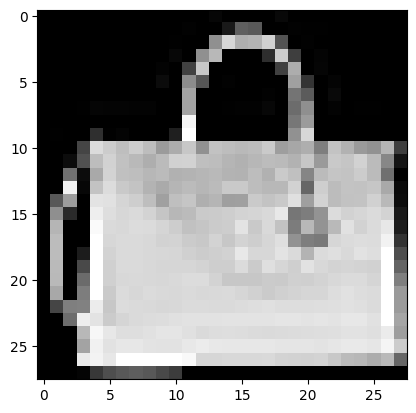

In [49]:
example = test_X[30]
print(test_Y[30])
plt.imshow(example, cmap = 'gray')
print(example.shape)
example = np.expand_dims(example, 0)
print(example.shape)
pred = model.predict(example)
print(pred, np.argmax(pred))
print(pred[pred > 0.5])

In [57]:
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[i], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)


    if i < len(true_label):
        true_label_i = np.argmax(true_label[i])
        if predicted_label == true_label_i:
            color = 'blue'
        else:
            color = 'red'
        plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                              100*np.max(predictions_array),
                                              class_names[true_label_i]),
                                              color=color)
    else:
        print("Index out of bounds:", i)

def plot_value_array(i, predictions_array, true_label):
  plt.grid(False)
  plt.xticks(range(num_class))
  plt.yticks([])
  thisplot = plt.bar(range(num_class), predictions_array, color="#777777")
  plt.ylim([0, 1])

  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label[i])

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

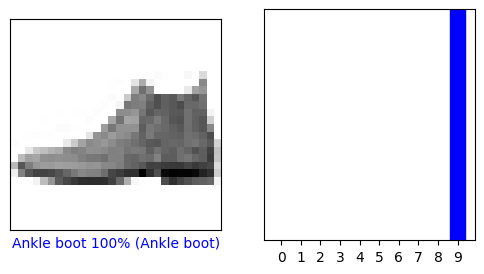

In [58]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_Y, test_X)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_Y)
plt.show()

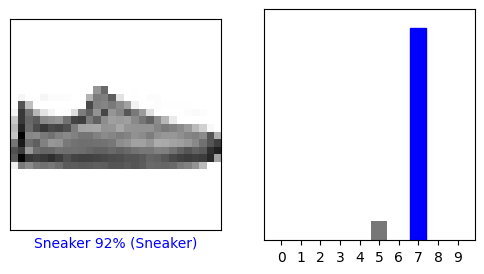

In [59]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_Y, test_X)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_Y)
plt.show()

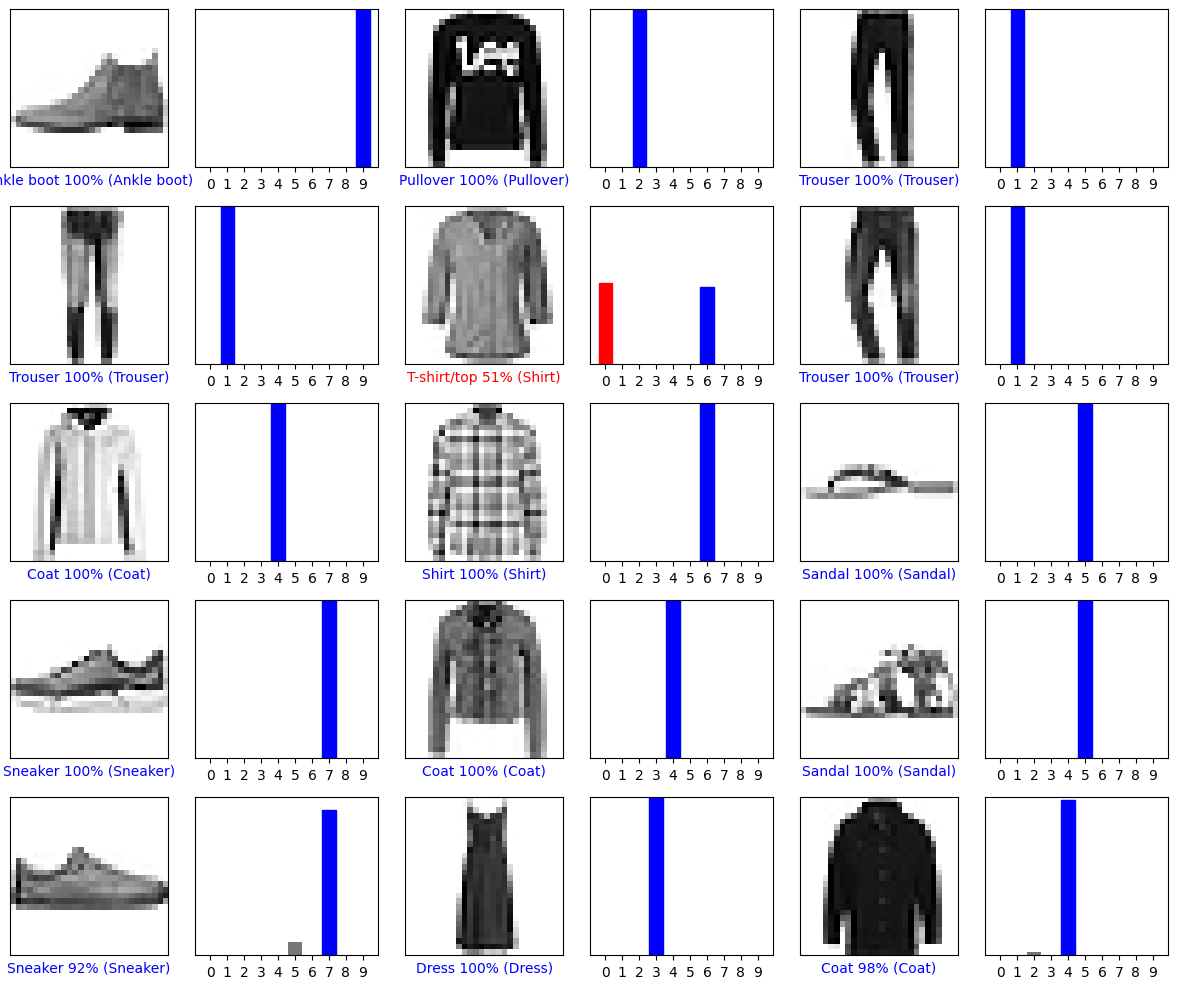

In [60]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_Y, test_X)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_Y)
plt.tight_layout()
plt.show()